#  Amphlett Static Model

### Version 0.9

<p style="text-align:justify;">
The Amphlett static model has been used to predict the performance of proton exchange membrane fuel cell. Key concepts in Amphlett static model are Nernst voltage, activation polarization loss, ohmic polarization loss and concentration polarization loss. Amphlett static model has a mechanistic and empirical approach to describe the performance of proton exchange membrane fuel cell. The ideal standard potential of an H2/O2 fuel cell is 1.229 V with liquid water product. The actual cell potential is decreased from its reference potential because of irreversible losses.
</p>

<div style="text-align:center;">
   
<img src="images/Static-Model-Graphic.jpg">  
<p style="text-align:center;">Fig1. Graphical Abstract of Static Models</p>
</div>

## Nernst Voltage

$$E_{Nernst}(V)=1.229-(8.5\times10^{-4})(T-298.15)+(4.308\times10^{-5})(T)[\ln(P_{H2})+0.5ln(P_{O2})]$$


In [1]:
from opem.Static.Amphlett import Enernst_Calc
Enernst=Enernst_Calc(T=343.15,PH2=1,PO2=1)
Enernst

1.19075

* Notice : from opem.Amphlett in version (0.3>)

## PEM Losses Model

### Activation

$$\eta_{activation}=\xi_{1}+\xi_{2}T+\xi_{3}T[ln(C_{O_{2}})]+\xi_{4}T[ln(i)]$$

$$\xi_{1}=-0.948$$

$$\xi_{2}=0.00286+0.0002\times ln(A)+(4.3\times10^{-5})[ln(C_{H_{2}})]$$

$$\xi_{3}=7.6\times10^{-5}$$

$$\xi_{4}=-1.93\times10^{-4}$$

$$C_{H_{2}}=\frac{P_{H_2}}{1.09\times10^{6}\times exp(\frac{77}{T})}$$

$$C_{O_{2}}=\frac{P_{O_2}}{5.08\times10^{6}\times exp(\frac{-498}{T})}$$

In [2]:
from opem.Params import xi1,xi3,xi4
print("XI1="+str(xi1))
print("XI3="+str(xi3))
print("XI4="+str(xi4))

XI1=-0.948
XI3=7.6e-05
XI4=-0.000193


In [3]:
from opem.Static.Amphlett import CO2_Calc,CH2_Calc,Xi2_Calc
CO2=CO2_Calc(PO2=1,T=343.15)
CH2=CH2_Calc(PH2=1,T=343.15)
XI2=Xi2_Calc(A=50.6,PH2=1,T=343.15)
print("XI2="+str(XI2))
print("CO2="+str(CO2))
print("CH2="+str(CH2))

XI2=0.0030373688787134006
CO2=8.402541445801334e-07
CH2=7.330294784824117e-07


In [4]:
from opem.Static.Amphlett import Eta_Act_Calc
Eta_Act=Eta_Act_Calc(T=343.15,PO2=1 , PH2=1, i=2, A=50.6)
Eta_Act

0.3164719546471556

### Ohmic

$$\eta_{ohmic}=i(R_{electronic}+R_{Proton})$$

$$R_{Proton}=\frac{\rho_m\times I}{A}$$

$$\rho_m=\frac{181.6[1+0.03(\frac{i}{A})+0.062(\frac{T}{303})^2(\frac{i}{A})^{2.5}]}{[\lambda-0.634-3(\frac{i}{A})]exp[4.18(\frac{T-303}{T})]}$$

* `Relectronic` Should be approximately constant over the relatively narrow
temperature range of PEM fuel cell operation.
Therefore, the parameter Relectronic can be taken as a constant, but
is generally difficult to predict and, therefore, is initially an unknown.

In [5]:
from opem.Static.Amphlett import Rho_Calc
Rho_Calc(i=2, A=50.6, T=343.15, lambda_param=23)

5.011385192458396

In [6]:
from opem.Static.Amphlett import Eta_Ohmic_Calc
Eta_Ohmic=Eta_Ohmic_Calc(i=2, l=0.0178, A=50.6, T=343.15, lambda_param=23, R_elec=0)
Eta_Ohmic

0.0035257966966703337

### Concentration

$$\eta_{Concentration}=-B\times ln(1-\frac{J}{J_{Max}})$$

$$J=\frac{i}{A}$$

$$J_{Max}=\frac{i_L}{A}$$

In [7]:
from opem.Static.Amphlett import Eta_Conc_Calc
Eta_Conc=Eta_Conc_Calc(i=2, A=50.6, B=0.016, JMax=1.5)
Eta_Conc

0.0004272617031588504

### VCell & VStack

$$Loss=\eta_{Activation}+\eta_{Ohmic}+\eta_{Concentration}$$

$$V_{cell}=E_{Nernst}-Loss$$

$$V_{Stack}=N\times V_{cell}$$

In [8]:
from opem.Static.Amphlett import Loss_Calc,Vcell_Calc,VStack_Calc
Loss=Loss_Calc(Eta_Act=Eta_Act,Eta_Conc=Eta_Conc,Eta_Ohmic=Eta_Ohmic)
Loss

0.32042501304698484

In [9]:
Vcell=Vcell_Calc(Enernst=Enernst,Loss=Loss)
Vcell

0.8703249869530152

In [10]:
VStack=VStack_Calc(Vcell=Vcell,N=2)
VStack

1.7406499739060304

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Stack}=N\times P$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [11]:
from opem.Static.Amphlett import Power_Calc,PowerStack_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=Vcell,i=2)
Power

1.7406499739060304

In [12]:
PowerStack_Calc(Power=Power,N=2)

3.4812999478120608

In [13]:
Power_Thermal_Calc(VStack=VStack,N=2,i=2)

1.4387000521879392

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{cell}}{HHV}$$

In [14]:
from opem.Params import uF,HHV
from opem.Static.Amphlett import Efficiency_Calc

In [15]:
uF

0.95

In [16]:
HHV

1.482

In [17]:
Efficiency_Calc(Vcell=Vcell)

0.5579006326621893

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0 to `i`=2 with `step`=0.1

In [18]:
Test_Vector={"T":343.15,"PH2":1,"PO2":1,"i-start":0,"i-stop":2,"i-step":0.1,"A":50.6,"l":0.0178,"lambda":23,"N":1,"R":0,"JMax":1.5,"B":0.016,"Name":"Test"}

* Notice : "Name", new in version 0.5

In [19]:
from opem.Static.Amphlett import Static_Analysis
Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=False,ReportMode=False)

{'EFF': [0.763301282051282,
  0.6874890758222313,
  0.6579364138373093,
  0.6405968621886462,
  0.628257558614402,
  0.618658070249436,
  0.610791539932373,
  0.60412087931632,
  0.5983254944546936,
  0.5931985956180685,
  0.5885989881753353,
  0.5844259636913888,
  0.5806051627342551,
  0.5770801158862924,
  0.5738069285336743,
  0.5707508038668997,
  0.567883690327933,
  0.5651826435194095,
  0.5626286570434207,
  0.5602058098699769],
 'I': [0,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.0,
  1.1,
  1.2,
  1.3,
  1.4,
  1.5,
  1.6,
  1.7,
  1.8,
  1.9],
 'K': -0.11440911221732857,
 'P': [0.0,
  0.1072482958282681,
  0.2052761611172405,
  0.29979933150428645,
  0.3920327165753869,
  0.4825532947945601,
  0.5717008813767012,
  0.6597000002134213,
  0.7467102170794577,
  0.8328508282477683,
  0.9182144215535232,
  1.0028749536944233,
  1.0868928646385256,
  1.1703184750174012,
  1.2531943319175447,
  1.3355568810485454,
  1.417437691058521,
  1.498864370613474,
  

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [20]:
Data=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Amphlett-Model Simulation
###########
Analyzing . . .
Done!


* Notice : "PrintMode" & "ReportMode" , new in version 0.5

In [21]:
Static_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Amphlett Simulation Failed!(Check Your Inputs)',
 'Status': False}

## Plot

In [22]:
import sys
!{sys.executable} -m pip install matplotlib;
import matplotlib.pyplot as plt

In [23]:
def plot_func(x,y,x_label,y_label,color='green'):
    plt.figure()
    plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


In [24]:
Test_Vector={
    "T": 343.15,
    "PH2": 1,
    "PO2": 1,
    "i-start": 0,
    "i-stop": 75,
    "i-step": 0.1,
    "A": 50.6,
    "l": 0.0178,
    "lambda": 23,
    "N": 1,
    "R": 0,
    "JMax": 1.5,
    "B": 0.016,
    "Name": "Amphlett_Test"}
data=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=False,ReportMode=True)

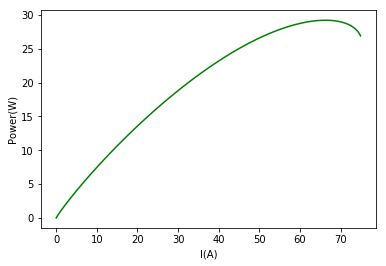

In [25]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

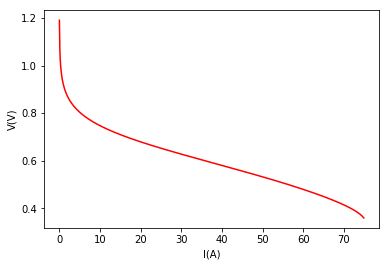

In [26]:
plot_func(data["I"],data["V"],"I(A)","V(V)","red")

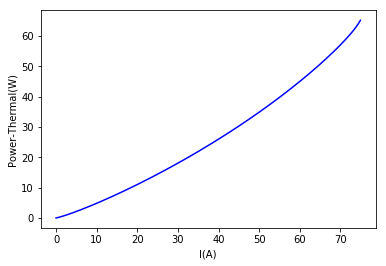

In [27]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

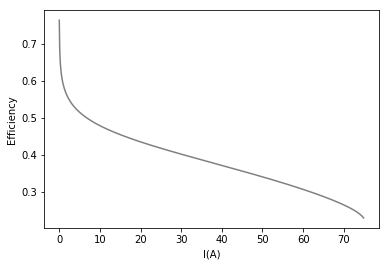

In [28]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

<a href="Amphlett/Amphlett_Test.html">HTML File</a>

<a href="Amphlett/Amphlett_Test.opem">OPEM File</a>

<a href="Amphlett/Amphlett_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User Input
2. System : Simulator Calculation (Middle Value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$P_{H2}$$</td>
        <td style="text-align:center;">Partial Pressure</td>
        <td>$$atm$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$P_{O2}$$</td>
        <td style="text-align:center;">Partial Pressure</td>
        <td>$$atm$$</td>
        <td>$$User$$</td>
        
    </tr>
    <tr>
        <td>$$T$$</td>
        <td style="text-align:center;">Cell Operation Temperature</td>
        <td>$$K$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$l$$</td>
        <td style="text-align:center;">Membrane Thickness</td>
        <td>$$cm$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$A$$</td>
        <td style="text-align:center;">Active area</td>
        <td>$$cm^2$$</td>
        <td>$$User$$</td>
    </tr>
         <tr>
        <td>$$\lambda$$</td>
        <td style="text-align:center;">An adjustable parameter with a possible minimum value of 14 and a maximum value of 23</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$J_{Max}$$</td>
        <td style="text-align:center;">Maximum current density of the cell</td>
        <td>$$Acm^{-2}$$</td>
        <td>$$User$$</td>
    </tr>
    
          <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">An empirical constant depending on the cell and its operation state</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    
              <tr>
        <td>$$N$$</td>
        <td style="text-align:center;">Number of single cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    
     <tr>
        <td>$$R_{electronic}$$</td>
        <td style="text-align:center;">R-Electronic</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
    
    
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    
    <tr>
        <td>$$\rho$$</td>
        <td style="text-align:center;">Membrane Specific Resistivity</td>
        <td>$$\Omega cm$$</td>
        <td>$$System$$</td>
    </tr>

     <tr>
        <td>$$J$$</td>
        <td style="text-align:center;">Actual current density of the cell </td>
        <td>$$Acm^{-2}$$</td>
        <td>$$System$$</td>
    </tr> 
    
    <tr>
        <td>$$C_{O_2}$$</td>
        <td style="text-align:center;">Concentration of oxygen in the catalytic interface of the cathode</td>
        <td>$$molcm^{-3}$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$C_{H_2}$$</td>
        <td style="text-align:center;">Concentration of hydrogen in the catalytic interface of the anode</td>
        <td>$$molcm^{-3}$$</td>
        <td>$$System$$</td>
    </tr> 
    <tr>
        <td>$$R_{Proton}$$</td>
        <td style="text-align:center;">Resistance to proton flow</td>
        <td>$$\Omega$$</td>
        <td>$$System$$</td>
    </tr> 
    
     <tr>
        <td>$$\xi_2$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$System$$</td>
    </tr> 
     <tr>
        <td>$$\xi_1$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$-0.948$$</td>
    </tr> 
     <tr>
        <td>$$\xi_3$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$7.6\times10^{-5}$$</td>
    </tr> 
     <tr>
        <td>$$\xi_4$$</td>
        <td style="text-align:center;">Parametric coefficients for cell model</td>
        <td>$$--$$</td>
        <td>$$-1.93\times10^{-4}$$</td>
    </tr> 
          <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher Heating Value Potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
    
          <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical Potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
     
    
    
    
</table>

## Reference
<blockquote>
1-J. C. Amphlett, R. M. Baumert, R. F. Mann, B. A. Peppley, and P. R. Roberge. 1995. "Performance Modeling of the Ballard Mark IV Solid Polymer Electrolyte Fuel Cell." J. Electrochem. Soc. (The Electrochemical Society, Inc.) 142 (1): 9-15. doi: 10.1149/1.2043959.
</blockquote>
<blockquote>
2-Jeferson M. Correa, Felix A. Farret, Vladimir A. Popov, Marcelo G. Simoes. 2005. "Sensitivity Analysis of the Modeling Parameters Used in Simulation of Proton Exchange Membrane Fuel Cells." IEEE Transactions on Energy Conversion (IEEE) 20 (1): 211-218. doi:10.1109/TEC.2004.842382.
</blockquote>